# Churn Dataset

The churn modeling dataset typically involves customer data from a business, often a telecommunications or banking company, with the primary goal of predicting which customers are likely to 'churn' or cease using the service. This dataset usually includes various demographic details like age, gender, and geography, along with financial information such as credit score, balance, estimated salary, and product usage (e.g., number of products, tenure, presence of a credit card, active membership status). The target variable, 'Exited', indicates whether a customer has churned. Analyzing this dataset helps businesses understand key factors influencing customer retention and develop strategies to prevent churn.

**Importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
df=pd.read_csv("Churn_Modelling.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
categorical_cols = ['Geography', 'Gender']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df.head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


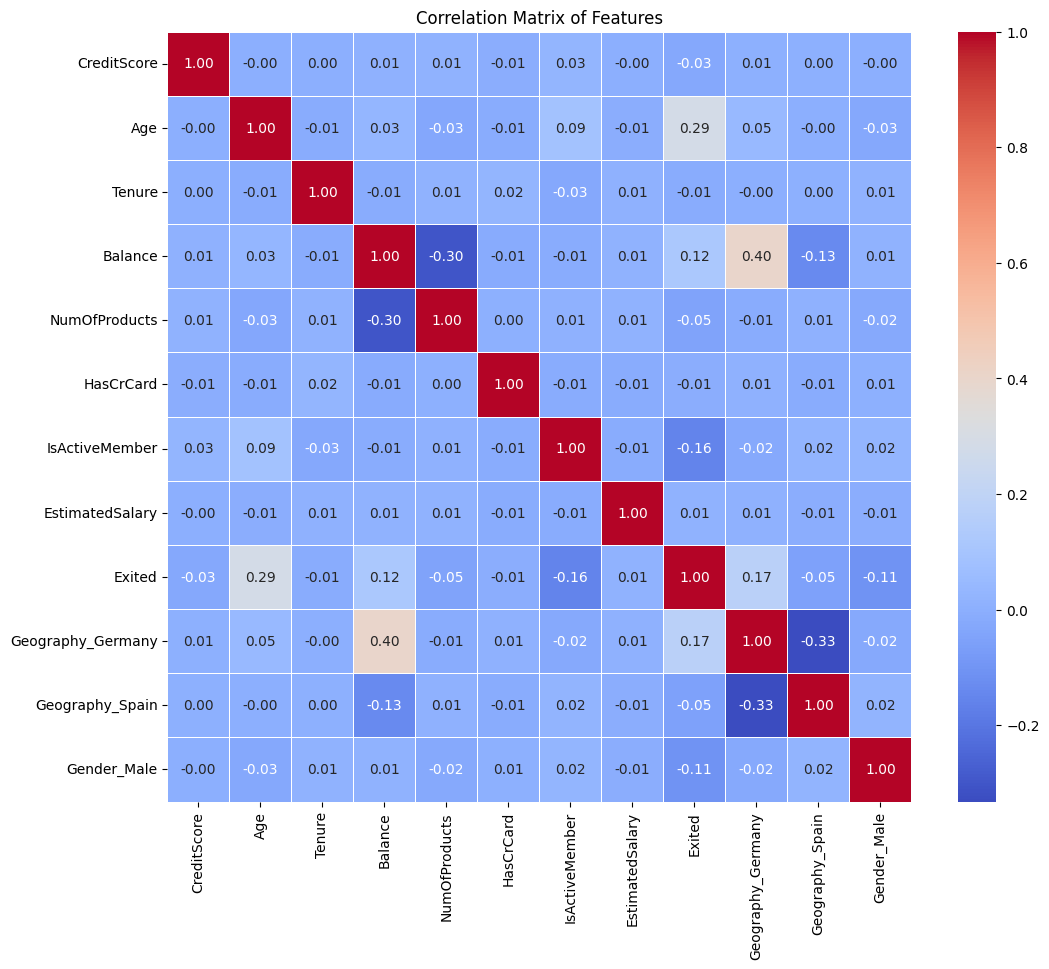

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
df.shape

(10000, 12)

**Splitting dataset for training and testing**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (8000, 11)
Shape of X_test: (2000, 11)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


**Using model :RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8665

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



## Why Random Forest is considered a 'Black Box' Model

Random Forest is often referred to as a 'black-box' model because of its inherent complexity, which makes its internal decision-making process difficult for humans to understand or interpret. Here's why:

1.  **Ensemble of Many Trees**: A Random Forest is an ensemble of many individual decision trees (hundreds or even thousands). Each tree is built on a random subset of the data and a random subset of features. While an individual decision tree can be visualized and understood (you can follow the path from root to leaf to see how a decision is made), combining the predictions of hundreds of these trees makes it practically impossible to trace the logic for any single prediction.

2.  **Averaging/Voting**: The final prediction of a Random Forest is typically an average of the predictions from all individual trees (for regression) or a majority vote (for classification). This aggregation further obscures the specific reasons behind a particular outcome.

3.  **Lack of Transparency**: There isn't a single, clear set of rules that can be easily extracted from the entire forest to explain why a specific input led to a particular output. Unlike simpler models like linear regression or a single decision tree, you can't point to a few coefficients or a simple decision path and say, 'this is why.'

While this 'black-box' nature can be a disadvantage when interpretability is crucial (e.g., in medical diagnoses or loan applications), the complexity is also what gives Random Forests their power and robustness in terms of predictive accuracy.

**Important features**

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = model.feature_importances_

# Get feature names from the training data
feature_names = X_train.columns

# Create a pandas Series for better visualization
importance_df = pd.Series(feature_importances, index=feature_names)

# Sort features by importance in descending order and get the top 5
top_5_features = importance_df.nlargest(5)

print("Top 5 Most Important Features:")
display(top_5_features)

Top 5 Most Important Features:


,0
Age,0.236922
EstimatedSalary,0.147558
CreditScore,0.143338
Balance,0.141612
NumOfProducts,0.131486


/tmp/ipython-input-3487823797.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_features.values, y=top_5_features.index, palette='viridis')


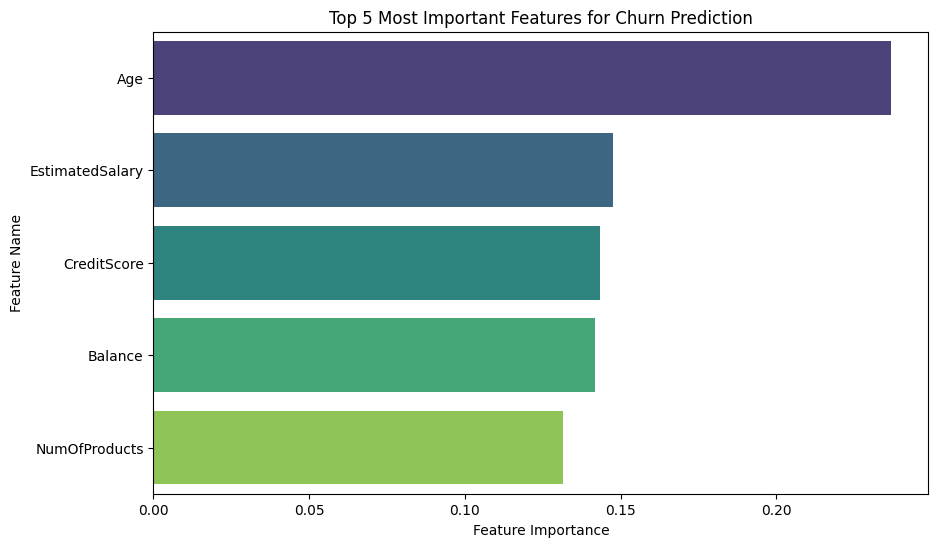

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the top 5 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_features.values, y=top_5_features.index, palette='viridis')
plt.title('Top 5 Most Important Features for Churn Prediction')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.show()

**SHAP Global Explanation**

In [ ]:
!pip install shap
print("SHAP library installed.")

SHAP library installed.



Initialize a SHAP TreeExplainer with the trained Random Forest model. This explainer will be used to calculate SHAP values.


In [ ]:
import shap

# Initialize a SHAP TreeExplainer with the trained Random Forest model
explainer = shap.TreeExplainer(model)

print("SHAP TreeExplainer initialized successfully.")

SHAP TreeExplainer initialized successfully.


In [ ]:
shap_values = explainer.shap_values(X_test)

print("SHAP values calculated successfully.")

SHAP values calculated successfully.


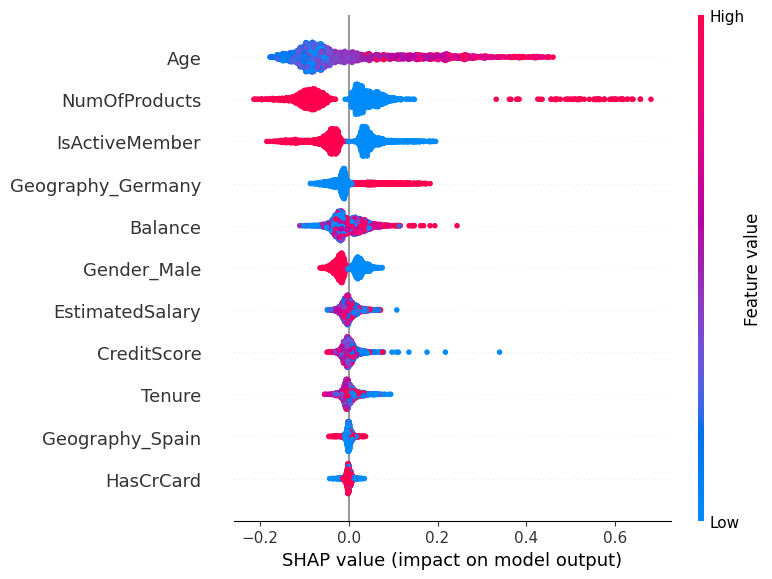

SHAP summary plot generated.


In [ ]:
shap.summary_plot(shap_values[:, :, 1], X_test)
print("SHAP summary plot generated.")

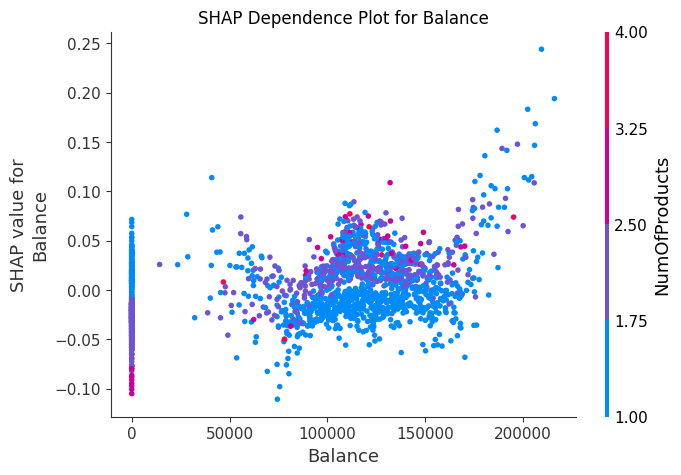

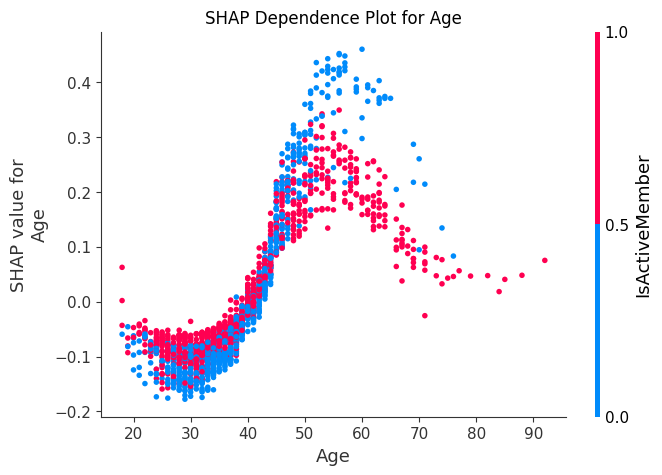

SHAP dependence plots generated for 'Balance' and 'Age'.


In [ ]:
import matplotlib.pyplot as plt

# Plot SHAP dependence for 'Balance'
shap.dependence_plot('Balance', shap_values[:, :, 1], X_test, interaction_index='auto', show=False)
plt.title("SHAP Dependence Plot for Balance")
plt.show()

# Plot SHAP dependence for 'Age'
shap.dependence_plot('Age', shap_values[:, :, 1], X_test, interaction_index='auto', show=False)
plt.title("SHAP Dependence Plot for Age")
plt.show()

print("SHAP dependence plots generated for 'Balance' and 'Age'.")

The SHAP analysis revealed that the model's predictions are influenced by various features, with 'Balance' and 'Age' being particularly impactful. The summary plot indicates the overall importance and direction of influence for each feature, while the dependence plots offer a more granular view of how individual feature values affect the SHAP values (and thus the prediction) and how they interact with other features.

SHAP dependence plots were successfully generated for 'Balance' and 'Age', providing insights into their individual effects on the model's predictions and their interactions with other features.



**LIME for Instance Explanation**

In [ ]:
!pip install lime
print("LIME library installed successfully.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=4e6eee5edd75bbfd1a0b6b549deb752953fa6091628a408fe754a889d66cba1a
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
LIME library installed successfully.


In [ ]:
feature_names = X_train.columns.tolist()
class_names = ['Not Exited', 'Exited']

print(f"Feature names: {feature_names}")
print(f"Class names: {class_names}")

Feature names: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'Gender_Male']
Class names: ['Not Exited', 'Exited']


**LIME explainer**

Initialize a `LimeTabularExplainer` with the appropriate parameters, including the training data, feature names, and class names. This explainer will be used to generate local explanations.


In [38]:
from lime.lime_tabular import LimeTabularExplainer

# Create Explainer
lime_explainer = LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X.columns.tolist(),
    class_names   = class_names,
    mode='classification'
)

# Explain one instance
i = 0

lime_exp = lime_explainer.explain_instance(
    X_test.iloc[i].values,
    model.predict_proba,
    num_features=5
)

lime_exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**SHAP Force Plot**

In [36]:
import shap

# Initialize JS first
shap.initjs()

# Select instance
index = 0

# Force Plot
shap.force_plot(
    explainer.expected_value[1],
    shap_values[index, :, 1],
    X_test.iloc[index]
)

This experiment demonstrated that a Random Forest Classifier can predict customer churn with reasonable accuracy, particularly for customers who do not churn. Key features influencing churn include 'Age', 'EstimatedSalary', 'CreditScore', 'Balance', and 'NumOfProducts'. Interpretability tools like SHAP and LIME were crucial in unraveling the model's 'black-box' nature, providing insights into both global feature importance and individual prediction drivers. These insights can empower businesses to develop targeted strategies for customer retention by understanding the specific factors contributing to churn.